# Agentic Behavior and Tool Calling with Large LLMs
## IMD1107 - Natural Language Processing
### [Dr. Elias Jacob de Menezes Neto](htttps://docente.ufrn.br/elias.jacob)

## Keypoints


- Agentic behavior refers to the ability of language models to perform goal-directed actions autonomously based on inputs and context.

- Tool/function calling enables LLMs to interact with external tools and resources, extending their capabilities beyond text generation.

- LangChain helps the creation of agents that use LLMs as reasoning engines to determine necessary actions and their inputs.

- Different agent architectures like ReAct, BabyAGI, and MRKL provide structured methods for building agents to handle various tasks.

- The general flow for tool calling involves generating tool calls, invoking appropriate tools, formatting results, and passing messages back to the model.

- Agents and AgentExecutors can be created to replicate tool interactions and achieve agentic behavior in LLMs.

- Structured output constrains the LLM's output to a specific format or structure, which is useful for data storage and information extraction.


## Learning Goals

By the end of this class, you will be able to:

1) **Define** agentic behavior for Large LLMs and explain its significance in enhancing the autonomy and functionality of AI systems.

2) **Describe** the concept of tool/function calling, articulating how it extends the capabilities of LLMs beyond text generation and enables interaction with external resources.

3) **Implement** basic tool calling in LangChain, utilizing practical examples such as fetching real-time data from external APIs to demonstrate the integration of LLMs with external tools.

4) **Compare and contrast** at least three different agent architectures (ReAct, BabyAGI, MRKL), outlining their distinct approaches to reasoning, action selection, and task execution within LLM-based agents.

5) **Apply** structured output techniques using LangChain and Pydantic to extract information from text in a predefined format, such as performing zero-shot Named Entity Recognition and Sentiment Analysis to structure LLM outputs for downstream applications.


# Introduction to Agentic Behavior in Language Models

Before diving into the technical aspects, let's understand what agentic behavior means with respect to LLMs. Agentic behavior refers to the ability of LLMs to perform goal-directed actions autonomously based on inputs and context. This capability allows LLMs to make decisions and take actions without direct human intervention.


This notebook explores the concepts of agentic behavior and tool calling in Large LLMs. We'll cover:

1. What agentic behavior means for LLMs
2. How tool calling extends LLM capabilities
3. Practical implementations using LangChain
4. Creating agents that interact with external tools
5. Generating structured output from LLMs

## Agents regarding Language Models

Agentic behavior refers to the ability of LLMs to perform goal-directed actions autonomously based on inputs and context. This means that LLMs can make decisions and take actions without direct human intervention. regarding LLMs, agents are systems that utilize LLMs as reasoning engines to determine necessary actions and their inputs. These agents can be used in various applications, such as chatbots, AI systems, and autonomous decision-making scenarios.

LLMs possess the capability to assess the context and inputs provided to them and make autonomous decisions regarding the actions to undertake. This feature is particularly valuable in scenarios that require real-time decision-making. Some common examples of autonomous decision-making in LLMs include:

- **Chatbots:** LLMs can be used to manage customer support by understanding queries and providing appropriate responses autonomously.
- **AI Systems:** LLMs can create content such as articles or summaries based on given topics without human intervention.

Before diving into the implementation details, let's clarify two key concepts:

1. **Agentic Behavior**: The ability of LLMs to autonomously make decisions and take actions based on inputs and context. This allows LLMs to operate more independently.

2. **Tool Calling**: The capability of LLMs to interact with external tools and resources, expanding their functionality beyond text generation. This enables LLMs to perform a wider range of tasks.

These concepts form the foundation for creating more multifaceted and powerful AI systems.

- The Role of LangChain in Agent Creation: \
While language models can generate text, they cannot directly take actions on their own. LangChain is a powerful framework that bridges this gap by assisting the creation of agents. These agents use LLMs as reasoning engines to determine the necessary actions and their inputs, enabling more complex and autonomous decision-making processes.

- Creating Agents with LangChain: \
While language models can generate text, they cannot directly take actions on their own. This is where **LangChain** comes into play. LangChain enables the creation of agents, which are systems that utilize an LLM as a reasoning engine to determine necessary actions and their inputs. The process involves feeding the results of those actions back into the agent, allowing it to decide whether additional actions are needed or if the task is complete.

- LangGraph: A More Flexible Approach to Agent Creation: \
**LangGraph** is an extension of LangChain that offers greater flexibility and customization options for building agents compared to previous concepts. It is recommended for modern agent development due to its enhanced controllability. For more detailed information on agent concepts, refer to the [LangGraph documentation](https://langchain-ai.github.io/langgraph/).

> **Note:** LangChain's earlier concept, **AgentExecutor**, served as a runtime for agents but lacked the flexibility required for more complex and customized agents. LangGraph addresses these limitations, providing a more flexible and controllable runtime. However, LangGraph is more complex than AgentExecutor and requires a deeper understanding of the basic concepts. LangGraph is outside our scope for this course.

## ReAct

There are several agent architectures that can be used to build agents with LLMs. A very popular one is called **ReAct**, which stands for **Reasoning and Acting**. This architecture combines reasoning and acting in an iterative process, allowing the agent to make decisions based on its observations and take actions accordingly. The general flow of ReAct agents includes:

1. **Reasoning:** The model "thinks" about the next step based on the input and previous observations.
2. **Action Selection:** The model chooses an action from the available tools or decides to respond to the user.
3. **Argument Generation:** The model generates arguments for the selected tool.
4. **Execution:** The agent runtime (executor) parses the chosen tool and calls it with the generated arguments.
5. **Observation:** The executor returns the results of the tool call back to the model as an observation.
6. **Iteration:** This process repeats until the agent decides to respond to the user.


## Introduction to Tool/Function Calling

Tool calling, also known as function calling, is a critical aspect of agentic behavior in LLMs. It enables LLMs to interact with external tools and resources, thereby extending their capabilities beyond text generation. Let's explore how tool calling works and its significance in enhancing LLM functionality.

<p align="center">
<img src="images/tool_call.png" alt="" style="width: 50%; height: 50%"/>
</p>

> **Note:** Despite the term "tool calling," the model itself does not execute the action or call the tool directly. Instead, it generates the necessary arguments for the tool, and the user decides whether to execute the tool.

#### Integrating LLMs with External Tools
LLMs can be integrated with a variety of external tools, such as:

- **APIs:** LLMs can interact with APIs to retrieve data or perform actions. For example, an LLM could generate the necessary arguments to call a weather API and retrieve current weather information for a specific location.
- **Databases:** LLMs can generate queries or commands to interact with databases, allowing them to retrieve, insert, or manipulate data based on the user's input.
- **Other External Resources:** LLMs can be integrated with tools like search engines, knowledge bases, or domain-specific applications to enhance their capabilities and provide more accurate or relevant responses.

#### Benefits of Tool Calling
Tool calling offers several benefits when working with LLMs:

1. **Enhanced Functionality:** By integrating with external tools, LLMs can perform a wider range of tasks and provide more thorough answers to user queries.
2. **Handling Complex Queries:** Tool calling enables LLMs to break down complex queries into smaller, manageable steps. The model can generate the necessary tool calls to retrieve information from multiple sources and combine the results to provide a final answer.
3. **Structured Output:** Tool calling allows LLMs to generate output that adheres to a specific format or structure, making it easier to process and use the generated data in downstream applications.


#### Key Points About Tools
- Enhances LLM functionality by employing external tools
- Enables handling of complex queries through structured tool interactions
- Provides structured output for easier processing in downstream applications

#### Real-World Examples
Here are a few examples of how tool calling can be used in real-world scenarios:

- **Search Engines:** An LLM can generate search queries based on a user's input and call a search engine API to retrieve relevant information. The model can then process the search results and provide a summarized answer to the user's question.
- **Weather API:** An LLM can be integrated with a weather API to provide current weather information or forecasts for a specific location. The model can generate the necessary API calls based on the user's input and present the weather data in a user-friendly format.
- **Database Queries:** LLMs can be used to generate SQL queries or database commands based on natural language input. For example, a user could ask, "What are the top 5 best-selling products in the last month?" The LLM would generate the appropriate database query, execute it, and return the results to the user.

> **Note:** LangChain provides a standardized interface for tool calling that is consistent across different models, making it easier to work with various LLMs and integrate them with external tools.

#### Tool Usage Flow
The general flow for using tool calling with LLMs is as follows:

1. Generate tool calls with a chat model in response to a query.
2. Invoke the appropriate tools using the generated tool call as arguments.
3. Format the result of the tool invocations as ToolMessages.
4. Pass the entire list of messages back to the model so that it can generate a final answer (or call more tools).

This flow allows LLMs to perform tasks and answer queries by employing external tools and resources, providing a more powerful and flexible approach to natural language processing.


## Practical Example: Tool Calling with LLMs

Now that we have covered the theoretical aspects, let's see tool calling in action. We will use LangChain to integrate LLMs with external tools and demonstrate how they can perform tasks autonomously.

In [2]:
# Import the load_dotenv function to load environment variables from a .env file
from dotenv import load_dotenv

# Import ChatOpenAI class from langchain_openai module
from langchain_openai import ChatOpenAI

# Import ChatOllama class from langchain_ollama module
from langchain_ollama import ChatOllama

# Import StructuredTool class from langchain_core.tools module
from langchain_core.tools import StructuredTool

# Import the os module to interact with the operating system
import os

# Load environment variables from a .env file
load_dotenv()  # You are expected to have a .env file with the OpenAI API KEY `OPENAI_API_KEY`

# Retrieve the OpenAI API key from the environment variables and print the first 10 characters
print(os.getenv("OPENAI_API_KEY")[:10])  # Here are the first 10 characters of my API KEY

sk-proj-eJ


In [3]:
# Initialize the ChatOpenAI model with specific parameters
model_openai = ChatOpenAI(
    model="gpt-4.1-mini",  # Specify the model to use
    temperature=0.0,  # Set the temperature for response variability
)  # This model costs around 0.15 USD per million tokens (input) and half of that (output).
# To learn more about models and pricing, go to https://openai.com/api/pricing/

# Initialize the ChatOllama model with specific parameters
model_llama = ChatOllama(
    model="llama3.1",  # Specify the model to use
    base_url="http://localhost:11434",  # Set the base URL where the Ollama service is running
    temperature=0.0,  # Set the temperature for response variability
)  # You must have Ollama running on your computer

In [4]:
model_openai.invoke("Qual o preço do RBRF11?").content  # This is a test to see if the model is working

'Não tenho acesso a dados em tempo real, incluindo preços atuais de ações ou fundos imobiliários como o RBRF11. Para obter o preço atualizado do RBRF11, recomendo consultar plataformas financeiras confiáveis, como o site da B3, Yahoo Finance, Google Finance, ou corretoras de valores. Se precisar, posso ajudar a entender como interpretar os dados desses sites!'

In [5]:
model_llama.invoke("Qual o preço do RBRF11?").content  # This is a test to see if the model is working

'Não tenho informações sobre o valor atual do RBRF11. O valor de ações pode variar rapidamente e depende de muitos fatores, incluindo as condições atuais do mercado, os resultados financeiros da empresa e outros eventos que possam afetar sua valorização. Se você está procurando informações sobre o preço atual ou histórico do RBRF11, recomendo verificar fontes financeiras confiáveis como sites de negociação de ações, serviços de notícias financeiras ou plataformas de análise de mercado.'

In [6]:
from datetime import datetime
import requests
from bs4 import BeautifulSoup


def fetch_latest_funds_price_real(ticker):
    """
    Retrieves the current quote and information of a Real Estate Investment Fund (FII) from B3.

    Args:
        ticker (str): The FII code (e.g., 'HGLG11', 'KNRI11')

    Returns:
        dict: A dictionary with the fund's information
    """
    # Ensure the ticker is in uppercase
    ticker = ticker.upper()

    # URL of the Status Invest website that provides FII data
    url = f"https://statusinvest.com.br/fundos-imobiliarios/{ticker}"

    # Headers to simulate a web browser
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"}

    try:
        # Make the HTTP request
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Parse the HTML content
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract FII name
        name_element = soup.select_one("#main-header > div.container.pl-2.pr-1.pl-xs-3.pr-xs-3 > div > div:nth-child(1) > h1 > small")
        name = name_element.text.strip() if name_element else "Not available"

        # Extract the current price
        price_element = soup.select_one("#main-2 > div.container.pb-7 > div.top-info.d-flex.flex-wrap.justify-between.mb-3.mb-md-5 > div.info.special.w-100.w-md-33.w-lg-20 > div > div:nth-child(1) > strong")
        price = price_element.text.strip() if price_element else "Not available"

        # Extract the dividend yield (DY)
        dy_element = soup.select_one("#main-2 > div.container.pb-7 > div.top-info.d-flex.flex-wrap.justify-between.mb-3.mb-md-5 > div:nth-child(4) > div > div:nth-child(1) > strong")
        dividend_yield = dy_element.text.strip() if dy_element else "Not available"

        # Collect the information in a dictionary
        result = {
            "ticker": ticker,
            "name": name,
            "price": f"R$ {price}",
            "dividend_yield": f"{dividend_yield} %",
            "query_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
        }

        if price == "Not available" or dividend_yield == "Not available":
            raise Exception("Data not found")
        else:
            return result

    except requests.exceptions.HTTPError as e:
        if e.response.status_code == 404:
            raise Exception("FII not found")
        else:
            raise e
    except Exception as e:
        raise e

In [7]:
# Test the function with the FII RBRF11
print(fetch_latest_funds_price_real("RBRF11"))

{'ticker': 'RBRF11', 'name': 'RBR ALPHA MULTIESTRATÉGIA REAL ESTATE', 'price': 'R$ 7,10', 'dividend_yield': '11,66 %', 'query_date': '20/05/2025 14:44:27'}


In [8]:
# Test the function with a non-existent FII
try:
    print(fetch_latest_funds_price_real("ZZZZ11"))
except Exception as e:
    print(e)

Data not found


In [9]:
from datetime import datetime


def fetch_latest_funds_price_mock(ticker):
    """
    Retrieves a mocked quote and information of a Real Estate Investment Fund (FII).

    This mocked version always returns a price of R$6,00 and a dividend yield of 10%,
    with the current date/time as the query date.

    Args:
        ticker (str): The FII code (e.g., 'HGLG11', 'KNRI11')

    Returns:
        dict: A dictionary with the fund's information
    """
    # Ensure the ticker is in uppercase for consistency
    ticker = ticker.upper()

    # Prepare the static, mocked result
    result = {
        "ticker": ticker,
        "name": "Fundo de Investimento Imobiliário",
        "price": "R$ 6,00",
        "dividend_yield": "10,00 %",
        "query_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
    }
    return result


# Test the mocked function with the FII ZZZZZ11
print(fetch_latest_funds_price_mock("ZZZZZ11"))

{'ticker': 'ZZZZZ11', 'name': 'Fundo de Investimento Imobiliário', 'price': 'R$ 6,00', 'dividend_yield': '10,00 %', 'query_date': '20/05/2025 14:44:38'}


In [10]:
import requests  # Import the requests library to make HTTP requests
from bs4 import BeautifulSoup  # Import BeautifulSoup to parse HTML content


def fetch_latest_funds_price(ticker: str) -> str:
    """Fetch the latest price of a real estate investment trust (REIT) in Brazil"""

    ticker = ticker.upper()

    try:
        result = fetch_latest_funds_price_real(ticker)
    except Exception as e:
        result = fetch_latest_funds_price_mock(ticker)

    full_name = result["name"]
    price = result["price"]
    dividend_yield = result["dividend_yield"]

    # Return a formatted string with the REIT's ticker, full name, current price, and change percentage
    return f"O fundo {full_name} ({ticker}) está sendo negociado a {price} com um yield de {dividend_yield}."


# Test the function with a sample ticker symbol
fetch_latest_funds_price("hglg11")  # This is a test to see if the function is working

'O fundo CGHG Logística (HGLG11) está sendo negociado a R$ 159,89 com um yield de 8,26 %.'

In [11]:
fetch_latest_funds_price("asbcks12")

'O fundo Fundo de Investimento Imobiliário (ASBCKS12) está sendo negociado a R$ 6,00 com um yield de 10,00 %.'

In [12]:
# Create a StructuredTool instance from the fetch_latest_funds_price function
tool_fetch_latest_funds_price = StructuredTool.from_function(
    func=fetch_latest_funds_price,  # Specify the function to be used by the tool
    parse_docstring=True,  # Enable parsing of the function's docstring to generate input and output schema
)

# Convert the tool's schema to JSON format and print it
tool_fetch_latest_funds_price.to_json()  # This will output the schema generated from the function's docstring

{'lc': 1,
 'type': 'not_implemented',
 'id': ['langchain_core', 'tools', 'structured', 'StructuredTool'],
 'repr': "StructuredTool(name='fetch_latest_funds_price', description='Fetch the latest price of a real estate investment trust (REIT) in Brazil', args_schema=<class 'langchain_core.utils.pydantic.fetch_latest_funds_price'>, func=<function fetch_latest_funds_price at 0x76a281a9c400>)",
 'name': 'fetch_latest_funds_price'}

In [13]:
# Bind the fetch_latest_funds_price tool to the ChatOpenAI model
# This allows the model to use the tool during its operations
model_openai_with_tools = model_openai.bind_tools([tool_fetch_latest_funds_price])

In [ ]:
# Invoke the model with the bound tools to get the price of the specified REIT
# The model uses the fetch_latest_funds_price tool to fetch the latest price
output = model_openai_with_tools.invoke("Qual o preço do RBRF11?")

# Display the output, which contains the price information of the REIT
output

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_BwGk6IpX3PXAzkgERyxPtd94', 'function': {'arguments': '{"ticker":"RBRF11"}', 'name': 'fetch_latest_funds_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 66, 'total_tokens': 86, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_79b79be41f', 'id': 'chatcmpl-BZLJPgrmzWjuAE06OCKoZKhNjSDxL', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ebfd02b0-9db6-4c87-8799-6d032bd1d6e4-0', tool_calls=[{'name': 'fetch_latest_funds_price', 'args': {'ticker': 'RBRF11'}, 'id': 'call_BwGk6IpX3PXAzkgERyxPtd94', 'type': 'tool_call'}], usage_metadata={'input_tokens': 66, 'output_tokens': 20, 'total_tokens': 86, 'input_token_details': {'a

In [ ]:
# Print the output in a pretty format
output.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  fetch_latest_funds_price (call_BwGk6IpX3PXAzkgERyxPtd94)
 Call ID: call_BwGk6IpX3PXAzkgERyxPtd94
  Args:
    ticker: RBRF11


In [16]:
output.tool_calls  # The model doesn't call any function, but it tells you in a structured way which function you should call and with which arguments

[{'name': 'fetch_latest_funds_price',
  'args': {'ticker': 'RBRF11'},
  'id': 'call_BwGk6IpX3PXAzkgERyxPtd94',
  'type': 'tool_call'}]

In [21]:
def fetch_latest_crypto_price_real(ticker):
    """Fetch the latest price of a cryptocurrency in Brazil. Accepts only BTC and ETH for now

    Args:
        ticker (str): The FII code (e.g., 'BTC', 'ETH')

    Returns:
        dict: A dictionary with the cryptos information
    """
    # Ensure the ticker is in uppercase
    ticker = ticker.upper()

    # URL of the Status Invest website that provides FII data
    url = f"https://statusinvest.com.br/criptomoedas/{ticker}"

    # Headers to simulate a web browser
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"}

    try:
        # Make the HTTP request
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Parse the HTML content
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract FII name
        name_element = soup.select_one("#main-header > div:nth-child(2) > div > div.d-flex.align-items-center > div:nth-child(2) > div.d-flex.align-items-center > h1 > small")
        name = name_element.text.strip() if name_element else "Not available"

        # Extract the current price
        price_element = soup.select_one("#main-2 > div.container > div > div.pb-3.pb-md-5 > div.top-info.has-special.d-flex.justify-between.flex-wrap > div.info.special.w-50.w-md-25 > div > div:nth-child(1) > strong")
        price = price_element.text.strip() if price_element else "Not available"

        # Collect the information in a dictionary
        result = {
            "ticker": ticker,
            "name": name,
            "price": f"R$ {price}",
            "query_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
        }

        if price == "Not available" or name == "Not available":
            raise Exception("Data not found")
        else:
            return result

    except requests.exceptions.HTTPError as e:
        if e.response.status_code == 404:
            raise Exception("Crypto not found")
        else:
            raise e
    except Exception as e:
        raise e


def fetch_latest_crypto_price_mock(ticker):
    """
    Retrieves a mocked quote and information of a Cryptocurrency.

    This mocked version always returns a price of R$500.000,00 for BTC and R$11.000,00 for other cryptos,
    with the current date/time as the query date.

    Args:
        ticker (str): The

    Returns:
        dict: A dictionary with the cryptos information
    """
    # Ensure the ticker is in uppercase for consistency
    ticker = ticker.upper()

    # Prepare the static, mocked result
    result = {
        "ticker": ticker,
        "name": "Criptomoeda",
        "price": "R$ 500.000,00" if ticker == "BTC" else "R$ 11.000,00",
        "query_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
    }
    return result


def fetch_latest_crypto_price(ticker: str) -> str:
    """Fetch the latest price of a cryptocurrency in Brazil"""

    ticker = ticker.upper()

    try:
        result = fetch_latest_crypto_price_real(ticker)
    except Exception as e:
        result = fetch_latest_crypto_price_mock(ticker)

    full_name = result["name"]
    price = result["price"]

    # Return a formatted string with the Cryptocurrency's ticker, full name, and current price
    return f"A criptomoeda {full_name} ({ticker}) está sendo negociada a {price}."

In [19]:
# Test the function with BTC
print(fetch_latest_crypto_price_real("BTC"))

{'ticker': 'BTC', 'name': 'Bitcoin', 'price': 'R$ 601.990,38', 'query_date': '20/05/2025 14:46:07'}


In [22]:
# Test the function with a non-existent Crypto
try:
    print(fetch_latest_crypto_price_real("ZZZZ11"))
except Exception as e:
    print(e)

Crypto not found


In [23]:
# Create a StructuredTool instance from the fetch_latest_crypto_price function
tool_fetch_latest_crypto_price = StructuredTool.from_function(
    func=fetch_latest_crypto_price,  # Specify the function to be used by the tool
    parse_docstring=True,  # Enable parsing of the function's docstring to generate input and output schema
)

# Convert the tool's schema to JSON format and print it
tool_fetch_latest_crypto_price.to_json()  # This will output the schema generated from the function's docstring

{'lc': 1,
 'type': 'not_implemented',
 'id': ['langchain_core', 'tools', 'structured', 'StructuredTool'],
 'repr': "StructuredTool(name='fetch_latest_crypto_price', description='Fetch the latest price of a cryptocurrency in Brazil', args_schema=<class 'langchain_core.utils.pydantic.fetch_latest_crypto_price'>, func=<function fetch_latest_crypto_price at 0x76a299071da0>)",
 'name': 'fetch_latest_crypto_price'}

In [24]:
# Bind multiple tools to the ChatOpenAI model
# This allows the model to use both the fetch_latest_funds_price and fetch_latest_crypto_price tools
model_openai_with_tools = model_openai.bind_tools(
    [
        tool_fetch_latest_funds_price,  # Tool to fetch the latest price of a REIT
        tool_fetch_latest_crypto_price,  # Tool to fetch the latest price of a cryptocurrency
    ]
)  # We can bind multiple tools at once

In [25]:
output = model_openai_with_tools.invoke("Qual o preço do RBRF11?")  # The model still knows how to answer the question about the REIT
output.tool_calls

[{'name': 'fetch_latest_funds_price',
  'args': {'ticker': 'RBRF11'},
  'id': 'call_DjTH8mr7h7OaLrFYLrhXK8Xh',
  'type': 'tool_call'}]

In [26]:
output = model_openai_with_tools.invoke("Qual o preço do Bitcoin?")  # As you can see, the model properly calls the function that fetches the latest price of a cryptocurrency and converts "Bitcoin" do BTC
output.tool_calls

[{'name': 'fetch_latest_crypto_price',
  'args': {'ticker': 'BTC'},
  'id': 'call_eWpiSaUvfx0eOiwG4k91ZUyD',
  'type': 'tool_call'}]

In [27]:
output = model_openai_with_tools.invoke("Qual o preço do Ethereum?")  # The same happens with Ethereum
output.tool_calls

[{'name': 'fetch_latest_crypto_price',
  'args': {'ticker': 'ETH'},
  'id': 'call_a2Vn7MPkpW2hG39XMotX69yF',
  'type': 'tool_call'}]

Even when an LLM cannot directly execute actions, it can generate the necessary arguments for tools, making it a powerful resource for automating tasks and interacting with external systems. This ability to call tools and interface with the outside world is a key aspect of agentic behavior in LLMs.

#### Replicating Tool Interactions with Llama 3.1 Locally

To see how we can achieve similar tool interactions using Llama 3.1 on a local machine, you'll first need to ensure the required models are downloaded locally. Once the models are downloaded and available on your local machine, you can proceed with integrating Llama 3.1 into your workflow to enable tool interactions similar to what we observed earlier.

In [28]:
def calculator(a: float, b: float, operation: str) -> float:
    """Perform a mathematical operation on two numbers.
    Operations: add, subtract, multiply, divide
    """
    # Check the operation type and perform the corresponding calculation
    if operation == "add":
        return a + b  # Addition
    elif operation == "subtract":
        return a - b  # Subtraction
    elif operation == "multiply":
        return a * b  # Multiplication
    elif operation == "divide":
        return a / b  # Division
    else:
        return "Invalid operation"  # Return an error message for invalid operations


# Create a tool using the StructuredTool class from the function we defined
tool_calculator = StructuredTool.from_function(
    func=calculator,  # Pass the calculator function
    parse_docstring=True,  # Enable parsing of the docstring
)

# Convert the tool to JSON format
tool_calculator.to_json()

{'lc': 1,
 'type': 'not_implemented',
 'id': ['langchain_core', 'tools', 'structured', 'StructuredTool'],
 'repr': "StructuredTool(name='calculator', description='Perform a mathematical operation on two numbers.\\nOperations: add, subtract, multiply, divide', args_schema=<class 'langchain_core.utils.pydantic.calculator'>, func=<function calculator at 0x76a2990716c0>)",
 'name': 'calculator'}

In [29]:
# Bind multiple tools to the Ollama model
# This allows the model to use the fetch_latest_funds_price, fetch_latest_crypto_price, and time_now tools
model_llama_with_tools = model_llama.bind_tools(
    [
        tool_fetch_latest_funds_price,  # Tool to fetch the latest price of a REIT
        tool_fetch_latest_crypto_price,  # Tool to fetch the latest price of a cryptocurrency
        tool_calculator,  # Tool to perform mathematical operations
    ]
)  # We can bind multiple tools at once

In [30]:
output = model_llama_with_tools.invoke("Qual o preço do RBRF11?")  # The model still knows how to answer the question about the REIT
output.tool_calls

[{'name': 'fetch_latest_funds_price',
  'args': {'ticker': 'RBRF11'},
  'id': 'c0229cdd-24d4-4b4a-9a81-3b93d5820f8c',
  'type': 'tool_call'}]

In [ ]:
output = model_llama_with_tools.invoke("Qual o preço do Bitcoin?")  # As you can see, the model properly calls the function that fetches the latest price of a cryptocurrency, but fails to convert "Bitcoin" to BTC

[{'name': 'fetch_latest_crypto_price',
  'args': {'ticker': 'Bitcoin'},
  'id': '1a89fe5e-99ce-4ecc-8c2b-fb1aa52a940d',
  'type': 'tool_call'}]

In [34]:
output = model_llama_with_tools.invoke("Qual o preço do Ethereum?")  # The same happens with Ethereum
output.tool_calls

[{'name': 'fetch_latest_crypto_price',
  'args': {'ticker': 'Ethereum'},
  'id': 'adc1ed28-4f7a-4194-82d4-7fcd316b6ec5',
  'type': 'tool_call'}]

In [ ]:
output = model_llama_with_tools.invoke("Quanto é 125 X 125?")  # The model properly calls the function that returns the calculator
output.tool_calls

[{'name': 'calculator',
  'args': {'a': 125, 'b': 125, 'operation': 'multiply'},
  'id': '9863e556-6c9b-48f2-a329-f5cb89745215',
  'type': 'tool_call'}]

In [39]:
output = model_llama_with_tools.invoke("Qual a cor do céu ao?")  # The model doesn't have a tool for that, so it will return an empty tool_call
output.tool_calls

[]

In [40]:
# But it can still answer the question using the model's capabilities
output.content

"I don't have the ability to process your request. However, I can tell you that the provided functions seem to be related to finance and mathematics, and they don't appear to be relevant to answering questions about the color of the sky.\n\nIf you'd like to ask a different question or provide more context, I'll do my best to assist you."

## Example: Creating an Agent and AgentExecutor

Integrating LLMs with external tools and resources can significantly enhance their capabilities, enabling them to perform a wider range of tasks autonomously. Both OpenAI and local Llama 3.1 models can be used to replicate tool interactions and achieve agentic behavior in LLMs.

To demonstrate the agentic behavior of LLMs in action, we can create an **Agent** and an **AgentExecutor**:

- An **Agent** is a system that utilizes an LLM as a reasoning engine to determine necessary actions and their inputs.
- The **AgentExecutor** is a runtime that executes the actions determined by the Agent.

With these components, we can create an autonomous system that can interact with external tools and resources to perform tasks without human intervention.

Let's go back to OpenAI GPT-4.1 to see how we can create an Agent and an AgentExecutor to replicate tool interactions and achieve agentic behavior in LLMs.

In [45]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

# Define the chat prompt template with a series of messages
prompt = ChatPromptTemplate.from_messages(
    [
        # System message to establish the assistant's role
        (
            "system",
            "You are a helpful assistant. Make sure to provide the best information about investments in Brazil. Answer in Portuguese, with Parnassianism style. ",
        ),
        # Placeholder for chat history to maintain context|
        ("placeholder", "{chat_history}"),
        # Human message placeholder for user input
        ("human", "{input}"),
        # Placeholder for the agent's intermediate thinking process
        ("placeholder", "{agent_scratchpad}"),
    ]
)

# List of tools the agent can use to fetch data
tools = [tool_fetch_latest_funds_price, tool_fetch_latest_crypto_price, tool_calculator]

# Construct the agent with the specified language model, tools, and prompt
agent = create_tool_calling_agent(llm=model_openai, tools=tools, prompt=prompt)

In [ ]:
# Create an instance of AgentExecutor with specified agent, tools, and verbosity
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Invoke the agent_executor with a dictionary containing the input query
output = agent_executor.invoke(
    {
        "input": "Qual o preço do Bitcoin?",  # The input query asking for the price of Bitcoin
    }
)



> Entering new AgentExecutor chain...

Invoking: `fetch_latest_crypto_price` with `{'ticker': 'BTC'}`


A criptomoeda Bitcoin (BTC) está sendo negociada a R$ 601.990,38.Ó nobre consulente, eis que o preço do Bitcoin, essa moeda digital que transcende o tempo e o espaço, encontra-se atualmente em R$ 601.990,38. Que esta informação lhe sirva de guia na senda dos investimentos. Deseja saber algo mais sobre o mercado financeiro no Brasil?

> Finished chain.


In [ ]:
output

{'input': 'Qual o preço do Bitcoin?',
 'output': 'Ó nobre consulente, eis que o preço do Bitcoin, essa moeda digital que transcende o tempo e o espaço, encontra-se atualmente em R$ 601.990,38. Que esta informação lhe sirva de guia na senda dos investimentos. Deseja saber algo mais sobre o mercado financeiro no Brasil?'}

In [48]:
# We can also force the agent to parse the output in a structured way by defining the output schema.
# For that, LangChain relies on Pydantic, a library for data validation using Python type annotations.

from pydantic import BaseModel, Field
from langchain.output_parsers import PydanticOutputParser


# Define a Pydantic model for the expected response structure
class PriceResponse(BaseModel):
    """The response of a function that fetches the latest price of a financial asset"""

    price: float = Field(description="The price of the asset")
    currency: str = Field(description="The currency of the price")
    ticker: str = Field(description="The ticker of the asset")
    full_name: str = Field(description="The full name of the asset")


# Create a parser that uses the Pydantic model
parser = PydanticOutputParser(pydantic_object=PriceResponse)

# Define a prompt template for the chat, including system instructions and placeholders
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Make sure to provide the best information about investments in Brazil. You always parse your output {format_instructions}.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

# Define the tools that the agent can use (e.g., functions to fetch latest fund and crypto prices)
tools = [tool_fetch_latest_funds_price, tool_fetch_latest_crypto_price, tool_calculator]

# Construct the agent with the given language model, tools, and prompt
agent = create_tool_calling_agent(llm=model_openai, tools=tools, prompt=prompt)

In [49]:
# Create an executor to run the agent, with verbose output for debugging
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Invoke the agent executor with the input question and format instructions for parsing the output
output = agent_executor.invoke(
    {
        "input": "Qual o preço do Bitcoin?",
        "format_instructions": parser.get_format_instructions(),
    }
)



> Entering new AgentExecutor chain...

Invoking: `fetch_latest_crypto_price` with `{'ticker': 'BTC'}`


A criptomoeda Bitcoin (BTC) está sendo negociada a R$ 601.990,38.{"ticker":"BTC","full_name":"Bitcoin","price":601990.38,"currency":"BRL"}

> Finished chain.


In [51]:
output["output"]

'{"ticker":"BTC","full_name":"Bitcoin","price":601990.38,"currency":"BRL"}'

In [52]:
# The following line uses a parser to parse the 'output' dictionary's 'output' key
# and assigns the parsed result to 'parsed_output'
parsed_output = parser.parse(output["output"])

# Display the parsed output
parsed_output

PriceResponse(price=601990.38, currency='BRL', ticker='BTC', full_name='Bitcoin')

In [53]:
output = agent_executor.invoke(
    {
        # "input" key contains the question we want to ask
        "input": "Qual o preço do KNSC11?",
        # "format_instructions" key contains instructions for how the output should be formatted
        "format_instructions": parser.get_format_instructions(),
    }
)



> Entering new AgentExecutor chain...

Invoking: `fetch_latest_funds_price` with `{'ticker': 'KNSC11'}`


O fundo KINEA SECURITIES FDO. DE INV. IMOB. - FII (KNSC11) está sendo negociado a R$ 8,88 com um yield de 12,27 %.{"ticker":"KNSC11","full_name":"KINEA SECURITIES FDO. DE INV. IMOB. - FII","price":8.88,"currency":"BRL"}

> Finished chain.


In [54]:
# The following line uses a parser to parse the 'output' dictionary's 'output' key
# and assigns the parsed result to 'parsed_output'
parsed_output = parser.parse(output["output"])

# Display the parsed output
parsed_output

PriceResponse(price=8.88, currency='BRL', ticker='KNSC11', full_name='KINEA SECURITIES FDO. DE INV. IMOB. - FII')

## Example: Reconstructing the Agent Executor with LangGraph

LangGraph is library designed to build stateful, multi-agent applications with LLMs. It excels in creating agent and multi-agent workflows due to its unique strengths: support for cycles, granular control, and built-in persistence. Unlike LangChain, that depend on Directed Acyclic Graphs (DAGs), LangGraph can handle cyclical flows, which are essential for most agent-based architectures. Its low-level design provides developers with detailed oversight over application flow and state, which is needed to build agents. Additionally, LangGraph's integrated persistence allows advanced functionalities such as human-in-the-loop processes and memory features.

LangGraph's design is inspired by Pregel and Apache Beam, with a public interface that draws from NetworkX. Though developed by LangChain Inc., the creators behind LangChain, LangGraph can be used independently.

A central concept in LangGraph is **state**. During graph execution, a state object is passed between nodes and updated according to each node's output. The method of updating the state can be determined by the graph type or a custom function defined by the developer. This state management maintains continuity and coherence in multi-step processes.

### Key Features

- **Cycles and Branching**: Carry out loops and conditional actions in applications. This is essential for scenarios where an agent might need to revisit previous steps based on new information.
- **Persistence**: Automatically save the state after each step. This is particularly useful for error recovery, human-in-the-loop workflows, and creating applications with memory features.
- **Human-in-the-Loop**: Pause graph execution to allow for human approval or modification of the agent's actions. This adds a layer of oversight and adaptability to the system.
- **Streaming Support**: Stream outputs, including token streaming, as they are produced by each node. This allows for real-time processing and feedback.
- **Incorporation with LangChain**: Seamlessly integrates with LangChain and LangSmith, though not required. This provides flexibility in choosing complementary tools and frameworks.

Let's see how we can create an agent and an agent executor using LangGraph to replicate tool interactions and achieve agentic behavior in LLMs.

In [55]:
tools

[StructuredTool(name='fetch_latest_funds_price', description='Fetch the latest price of a real estate investment trust (REIT) in Brazil', args_schema=<class 'langchain_core.utils.pydantic.fetch_latest_funds_price'>, func=<function fetch_latest_funds_price at 0x76a281a9c400>),
 StructuredTool(name='fetch_latest_crypto_price', description='Fetch the latest price of a cryptocurrency in Brazil', args_schema=<class 'langchain_core.utils.pydantic.fetch_latest_crypto_price'>, func=<function fetch_latest_crypto_price at 0x76a299071da0>),
 StructuredTool(name='calculator', description='Perform a mathematical operation on two numbers.\nOperations: add, subtract, multiply, divide', args_schema=<class 'langchain_core.utils.pydantic.calculator'>, func=<function calculator at 0x76a2990716c0>)]

In [56]:
model_openai_with_tools = model_openai.bind_tools(tools)  # The model needs to know which tools it can use, that why we bind the tools

In [57]:
model_openai_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x76a281a94e60>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x76a281a97590>, root_client=<openai.OpenAI object at 0x76a2981b2d20>, root_async_client=<openai.AsyncOpenAI object at 0x76a281a94ec0>, model_name='gpt-4.1-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'fetch_latest_funds_price', 'description': 'Fetch the latest price of a real estate investment trust (REIT) in Brazil', 'parameters': {'properties': {'ticker': {'type': 'string'}}, 'required': ['ticker'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'fetch_latest_crypto_price', 'description': 'Fetch the latest price of a cryptocurrency in Brazil', 'parameters': {'properties': {'ticker': {'type': 'string'}}, 'required': ['ticker'], 'type': 'object'}}}, {'type': 'funct

In [59]:
from langgraph.prebuilt import ToolNode

tool_node = ToolNode(tools)

output = tool_node.invoke({"messages": [model_openai_with_tools.invoke("Qual o preço do Bitcoin?")]})

In [60]:
# Notice that the ToolNode runs the tools, returning a ToolMessage with the details about the tool call
output

{'messages': [ToolMessage(content='A criptomoeda Bitcoin (BTC) está sendo negociada a R$ 601.990,38.', name='fetch_latest_crypto_price', tool_call_id='call_RGwU7KYLCSOIootyaeD4qR3c')]}

### Understanding the StateGraph and State Management in LangGraph

In LangGraph, the **StateGraph** serves as the central structure for managing and manipulating data as it flows through a series of operations. This graph employs a unique approach where a **state object** traverses through each node, undergoing modifications at each step. Think of the state object as a container carrying information, and each node as a processing unit that can update this information.

#### Example: Managing Messages with a TypedDict

Let's imagine our state object is designed to manage a list of messages. We can represent this using a Python **TypedDict**, which enforces data types within the dictionary. In this case, the TypedDict would have a single key, `"messages"`, ensuring that all nodes interact with the state object consistently.

As the state object moves through the StateGraph:

1. **Initial State**: The state object begins with an empty list under the `"messages"` key.
2. **Node A**: This node appends its message to the list stored under the `"messages"` key. 
3. **Node B**:  Similarly, Node B adds its own message to the existing list within the `"messages"` key.
4. **Final State**: The state object now holds a list containing messages from both Node A and Node B, demonstrating the cumulative effect of nodes within the StateGraph.


In [61]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage


# Define a TypedDict named AgentState
# TypedDict is used to define a dictionary with a specific structure and types for its keys and values
class AgentState(TypedDict):
    # The 'messages' key is annotated with a sequence of BaseMessage objects
    # Annotated is used to add metadata to the type hint
    messages: Annotated[list[AnyMessage], add_messages]

### Defining Nodes and Edges in LangGraph

Let's focus on the fundamental building blocks of our graph: nodes and edges. Within the **LangGraph** framework, we categorize nodes as either *functions* or *runnables*, each serving distinct purposes. Let's probe into the two primary nodes critical for our workflow:

1. **The Agent:** This node acts as the decision-making entity within our graph. Its primary responsibility is to analyze the current state and determine the appropriate course of action. This could involve deciding whether to invoke external tools, gather more information, or conclude the process.

2. **Function to Invoke Tools:** This node comes into play when the agent determines that specific actions, facilitated by external tools, are necessary.  It acts as the bridge between our graph and these external tools, executing the actions dictated by the agent.

Beyond individual nodes, the connections between them, represented by **edges**, are equally important.  These edges dictate the flow of information and execution within our graph.  **LangGraph** utilizes two primary edge types:

- **Conditional Edge:** This type of edge introduces dynamic behavior into our graph. Instead of a fixed path, the flow diverges based on the output of the preceding node.  Consider the agent node: if it determines an action is needed, the conditional edge directs the flow towards the "Function to Invoke Tools" node. Conversely, if no action is required, the process might terminate or follow a different path. The Language Learning Model (LLM) plays a vital role here, evaluating the node's output and determining the appropriate path to follow at runtime.

- **Normal Edge:** Unlike its conditional counterpart, a normal edge represents a fixed transition between nodes.  Once the "Function to Invoke Tools" node completes its operation, the normal edge ensures a consistent return to the agent node, allowing it to evaluate the outcome and decide on subsequent steps.

#### Visualizing the Workflow

Here's an illustration of the interaction of these nodes and edges within our workflow:

1. **Agent Node:** The workflow begins with the agent assessing the situation. Think of it as a decision point, evaluating whether external tools are necessary.

2. **Conditional Edge:** Based on the agent's decision, the flow diverges:
    - **Action Required:** The conditional edge directs the flow towards the "Function to Invoke Tools" node to execute the required action.
    - **No Action Required:**  The process might end, or the conditional edge could lead to a different path based on predefined logic.

3. **Function to Invoke Tools Node:** Upon activation, this node executes the necessary action, utilizing the designated external tools. 

4. **Normal Edge:**  Regardless of the outcome of the tool invocation, the flow consistently returns to the agent node via the normal edge. This feedback loop allows the agent to re-evaluate the situation based on the action's result and make further decisions.

> **Key Takeaway:** The dynamic nature of conditional edges, driven by the LLM's real-time evaluation, sets **LangGraph** apart. This adaptability allows the graph to gracefully handle various scenarios and inputs, making it a powerful tool for building complex, decision-driven workflows. 


In [62]:
from langgraph.graph import StateGraph, MessagesState, START, END


# Define the function that determines whether to continue or not
def should_continue(state):
    # Extract the list of messages from the state dictionary
    messages = state["messages"]
    # Get the last message in the list
    last_message = messages[-1]
    # Check if the last message contains any tool calls
    # If there are no tool calls, return "end" to indicate the process should finish
    if not last_message.tool_calls:
        return END
    # If there are tool calls, return "tools" to indicate the process should continue
    else:
        return "tools"


# Define the function that calls the model
def call_model(state: MessagesState):
    # Extract the list of messages from the state dictionary
    messages = state["messages"]
    # Invoke the model with the current list of messages and get the response
    response = model_openai_with_tools.invoke(messages)
    # Return a dictionary with the response message wrapped in a list
    # This will be added to the existing list of messages in the state
    return {"messages": [response]}

### Define the Graph

Having established the primary nodes and the types of edges, we can now integrate these elements to define the graph. This graph will represent the workflow, guiding the decision-making process and subsequent actions.

#### Components of the Graph

- **Nodes**: The fundamental units of the graph, representing decision points and actions.
    1. **Agent Node**: Determines the necessity of an action.
    2. **Function to Invoke Tools Node**: Executes the required action if deemed necessary by the agent.

- **Edges**: The connections between nodes, dictating the flow of the process.
    - **Conditional Edges**: These edges are based on the agent's decision:
        - **If action required**: Connects the agent node to the function to invoke tools node.
        - **If no action required**: Ends the process.
    - **Normal Edge**: Connects the function to invoke tools node back to the agent node for further decisions.

#### Graph Workflow

1. **Initialization**: Start at the agent node.
2. **Decision Point**: The agent node evaluates whether an action is necessary.
    - **If action required**: Proceed to the function to invoke tools node.
    - **If no action required**: End the process.
3. **Action Execution**: If directed, the function to invoke tools node executes the action.
4. **Feedback Loop**: After executing the action, the normal edge returns the process to the agent node for further evaluation and decision-making.

In [63]:
from langgraph.graph import END, StateGraph, START

# Define a new state graph for the workflow
# StateGraph is used to create a directed graph where nodes represent states and edges represent transitions
workflow = StateGraph(AgentState)

# Add nodes to the graph
# Each node represents a state in the workflow and is associated with a function to be executed

# Add a node named "agent" that will call the model
workflow.add_node("agent", call_model)

# Add a node named "tools" that will call the tool node
workflow.add_node("tools", tool_node)

# Set the entry point of the workflow to the "agent" node
# This means the "agent" node will be the first node executed when the workflow starts
workflow.add_edge(START, "agent")

# Add conditional edges from the "agent" node
# Conditional edges determine the next node to be executed based on the output of a function

# Define conditional edges for the "agent" node
workflow.add_conditional_edges(
    "agent",  # Start node for the conditional edges
    should_continue,  # Function to determine the next node
    ["tools", END],
)

# Add a normal edge from the "action" node to the "agent" node
# This creates a cycle between the "agent" and "action" nodes
# After the "action" node is executed, the workflow transitions back to the "agent" node
workflow.add_edge("tools", "agent")

# Compile the workflow into a LangChain Runnable
# This allows the workflow to be executed as a runnable object
app = workflow.compile()


#### Visual Representation

- **Agent Node**: The starting point and decision-maker.
- **Conditional Edge**: Leads to either the function to invoke tools node or ends the process.
- **Function to Invoke Tools Node**: Executes the action if needed.
- **Normal Edge**: Loops back to the agent node.

> **Note:** The dynamic nature of the conditional edge allows the graph to adapt based on real-time decisions made by the agent.

Let's see below an image representing the graph workflow.

In [71]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle

try:
    # Generate and display a visual representation of the workflow graph
    # The get_graph method is called on the app object with xray=True to include detailed information
    # The draw_mermaid_png method converts the graph to a PNG image using Mermaid.js
    # The curve_style parameter is set to CurveStyle.NATURAL to use smooth curves for the edges in the graph
    graph_image = app.get_graph(xray=True).draw_mermaid_png(curve_style=CurveStyle.NATURAL)

    # Display the generated image in the Jupyter notebook
    display(Image(graph_image))
except Exception as e:
    # If an error occurs during the graph generation or display, print the error message
    print(e)
    print(app.get_graph().print_ascii())  # Print the graph in ASCII format as a fallback

HTTPSConnectionPool(host='mermaid.ink', port=443): Read timed out. (read timeout=10)
        +-----------+         
        | __start__ |         
        +-----------+         
              *               
              *               
              *               
          +-------+           
          | agent |           
          +-------+           
         *         .          
       **           ..        
      *               .       
+-------+         +---------+ 
| tools |         | __end__ | 
+-------+         +---------+ 
None


Now, we can use our Graph like any other LangChain runnable.

In [72]:
from langchain_core.messages import HumanMessage

# We can use just like the Agent + Agent Executor created above
inputs = {"messages": [HumanMessage(content="Qual o preço do BitCoin")]}
result = app.invoke(inputs)

print(result)

{'messages': [HumanMessage(content='Qual o preço do BitCoin', additional_kwargs={}, response_metadata={}, id='f30b77a9-0bcb-4260-a7bb-baa01aa6a79b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Gogqyf8wo3n41qL83vQy3VON', 'function': {'arguments': '{"ticker":"BTC"}', 'name': 'fetch_latest_crypto_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 128, 'total_tokens': 144, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_79b79be41f', 'id': 'chatcmpl-BZLa2a6reepywicoN62vufugT9JDe', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e59885c6-e9b6-4a4f-8cb9-2fa99cdae629-0', tool_calls=[{'name': 'fetch_latest_crypto_price', 'args': {'ticker': 'BTC'}, 'id': 'call_Gogqy

In [74]:
for message in result["messages"]:
    message.pretty_print()  # Print each message in a pretty format
    print("\n\n")

================================ Human Message =================================

Qual o preço do BitCoin



================================== Ai Message ==================================
Tool Calls:
  fetch_latest_crypto_price (call_Gogqyf8wo3n41qL83vQy3VON)
 Call ID: call_Gogqyf8wo3n41qL83vQy3VON
  Args:
    ticker: BTC



================================= Tool Message =================================
Name: fetch_latest_crypto_price

A criptomoeda Bitcoin (BTC) está sendo negociada a R$ 601.990,38.



================================== Ai Message ==================================

O preço do Bitcoin (BTC) atualmente é de R$ 601.990,38.





In [75]:
# We can also stream the execution of the workflow

for output in app.stream(inputs, stream_mode="values"):
    # stream() yields dictionaries with output keyed by node name
    output["messages"][-1].pretty_print()
    print("\n\n")

================================ Human Message =================================

Qual o preço do BitCoin



================================== Ai Message ==================================
Tool Calls:
  fetch_latest_crypto_price (call_CYKteZZwfOw5g0ktzUeMUdby)
 Call ID: call_CYKteZZwfOw5g0ktzUeMUdby
  Args:
    ticker: BTC



================================= Tool Message =================================
Name: fetch_latest_crypto_price

A criptomoeda Bitcoin (BTC) está sendo negociada a R$ 601.990,38.



================================== Ai Message ==================================

O preço do Bitcoin (BTC) atualmente é de R$ 601.990,38.





#### Unleashing the power of cycles

LangGraph's ability to handle cycles is a game-changer for agent-based systems. Cycles allow agents to revisit previous steps based on new information, enabling more dynamic and adaptable workflows. This flexibility is critical for scenarios where an agent needs to refine a search based on updated data or revisit previous decisions based on new insights. This makes the Agent capable to handle complex tasks.
Let's use this cycle capability to test if the agent can make more complex reasoning, like handling multiple questions and tasks at once.

In the example below, we'll ask "How many BTC can I buy with 1,000 HGLG11?". Note that the Agent will need to:
- Get BTC prices
- Get HGLG11 prices
- Use the calculator to get the answer

This is a more complex task that requires multiple steps and reasoning. Let's see how the Agent can handle it.

In [76]:
inputs = {"messages": [HumanMessage(content="Quantos bitcoins eu consigo comprar com 1000 cotas do HGLG11?")]}
for output in app.stream(inputs, stream_mode="values"):
    # stream() yields dictionaries with output keyed by node name
    output["messages"][-1].pretty_print()
    print("\n\n")

================================ Human Message =================================

Quantos bitcoins eu consigo comprar com 1000 cotas do HGLG11?



================================== Ai Message ==================================
Tool Calls:
  fetch_latest_funds_price (call_9oOSF7sFOpSusdBhDIBtYWKj)
 Call ID: call_9oOSF7sFOpSusdBhDIBtYWKj
  Args:
    ticker: HGLG11
  fetch_latest_crypto_price (call_kArxtMUQM4MA7Exzz6pDnJat)
 Call ID: call_kArxtMUQM4MA7Exzz6pDnJat
  Args:
    ticker: BTC



================================= Tool Message =================================
Name: fetch_latest_crypto_price

A criptomoeda Bitcoin (BTC) está sendo negociada a R$ 601.990,38.



================================== Ai Message ==================================
Tool Calls:
  calculator (call_PUSPxwytUctCzj1DZqRXbtfr)
 Call ID: call_PUSPxwytUctCzj1DZqRXbtfr
  Args:
    a: 159.86
    b: 1000
    operation: multiply



================================= Tool Message =================================
Name

> #### Multi-Agent Systems in LangGraph
>
> In the previous example, we saw a basic agent capable of handling simple tasks. However, LangGraph's true potential lies in its ability to create more complex agents and multi-agent systems. These systems can manage multiple tasks simultaneously and interact with each other to achieve sophisticated objectives.
>
> A multi-agent system consists of multiple agents that collaborate to solve problems or achieve goals that are beyond the capabilities of a single agent. This collaboration can be orchestrated in various ways, depending on the architecture and the specific requirements of the task.
>
> One example of a multi-agent system is the **Agent Supervisor Architecture**. In this setup, multiple agents work together under the supervision of a central agent (the supervisor). The supervisor coordinates the activities of the individual agents, ensuring that they work towards a common goal efficiently.
>
> - **Key Components**:
>   - **Supervisor Agent**: This agent oversees the entire system, assigning tasks to individual agents and monitoring their progress.
>   - **Worker Agents**: These agents perform the tasks assigned by the supervisor. Each worker agent may specialize in different types of tasks, allowing the system to handle a variety of activities simultaneously.
>
> Below is a diagram illustrating the Agent Supervisor Architecture:
>
> <p align="center">
> <img src="images/agent_supervisor_diagram.png" alt="Agent Supervisor Diagram" style="width: 30%; height: 30%"/>
> </p>
>
> - **Benefits of Multi-Agent Systems**:
>   - **Scalability**: Multi-agent systems can easily scale by adding more agents to handle increased workload.
>   - **Flexibility**: Different agents can be designed to handle specific tasks, making the system adaptable to various requirements.
>   - **Robustness**: The failure of a single agent does not necessarily compromise the entire system, as other agents can continue to function independently.
>
>
>
> To dive deeper into multi-agent workflows and explore more complex architectures, refer to [this post](https://blog.langchain.dev/langgraph-multi-agent-workflows/) and [this page](https://langchain-ai.github.io/langgraph/concepts/multi_agent/#multi-agent-architectures)
>

## Example: Agent that interacts with Pandas DataFrame

LangChain provides a convenient way to create an Agent that interacts with a Pandas DataFrame. This Agent can perform various operations on the DataFrame based on user queries, such as filtering, sorting, and summarizing data.

### Creating a Pandas DataFrame Agent

LangChain offers the `create_pandas_dataframe_agent` function, which allows you to easily build an Agent that interacts with a Pandas DataFrame. Here's a step-by-step breakdown of the process:

1. **Define the DataFrame**: Start by creating or loading your Pandas DataFrame that contains the data you want to work with.

2. **Create the Agent**: Use the `create_pandas_dataframe_agent` function provided by LangChain to create the Agent. This function takes the DataFrame and the specified tools as input and returns an Agent instance.

3. **Interact with the Agent**: Once the Agent is created, you can provide user queries or instructions to it. The Agent will analyze the query, determine the appropriate tool or sequence of tools to use, and generate the corresponding tool calls to perform the requested operation on the DataFrame.

4. **Retrieve the Results**: After the Agent executes the tool calls, it returns the results, which can be the modified DataFrame, a subset of the data, or any relevant information based on the user's query.

### Security Considerations

> **Important Security Notice:**
>
> The Pandas DataFrame Agent relies on access to a Python REPL (Read-Eval-Print Loop) tool, which allows the execution of arbitrary code. This can be dangerous and requires a specially sandboxed environment to be used safely.
>
> Failure to run this code in a properly sandboxed environment can lead to arbitrary code execution vulnerabilities, which can result in data breaches, data loss, or other security incidents.
>
> To mitigate these risks:
> - Do not use this code with untrusted inputs or in environments with elevated permissions.
> - Opt-in to this functionality explicitly by setting `allow_dangerous_code=True`.

<br>

`Let's see that in action using the widely known Iris dataset!`

In [77]:
# Import the function to create an agent that works with pandas DataFrames
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

# Import the pandas library for data manipulation
import pandas as pd

# Read the Iris dataset from the provided URL into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/iris.data")

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [79]:
# Initialize a ChatOpenAI model with specific parameters
model_openai = ChatOpenAI(
    model="gpt-4.1-mini",  # Specify the model to use
    temperature=0,  # Set the temperature to 0 for deterministic responses
)

# Create a pandas dataframe agent using the specified LLM model and dataframe
pandas_agent = create_pandas_dataframe_agent(
    llm=model_openai,  # Pass the initialized ChatOpenAI model
    df=df,  # Provide the dataframe to be used by the agent
    verbose=True,  # Enable verbose mode for detailed logging
    agent_type="openai-tools",  # Specify the type of agent to create
    allow_dangerous_code=True,  # Opt-in to allow the use of the REPL tool
)

In [80]:
output = pandas_agent.invoke("How many rows and columns does this dataset have?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape'}`


(150, 5)The dataset has 150 rows and 5 columns.

> Finished chain.


In [81]:
output

{'input': 'How many rows and columns does this dataset have?',
 'output': 'The dataset has 150 rows and 5 columns.'}

In [82]:
output = pandas_agent.invoke("How many of each species are in this dataset?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['Name'].value_counts()"}`


Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64The dataset contains 50 samples of each species: Iris-setosa, Iris-versicolor, and Iris-virginica.

> Finished chain.


In [83]:
print(output["output"])

The dataset contains 50 samples of each species: Iris-setosa, Iris-versicolor, and Iris-virginica.


In [84]:
output = pandas_agent.invoke("What is the average sepal length of each species?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.groupby('Name')['SepalLength'].mean()"}`


Name
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLength, dtype: float64The average sepal length of each species is as follows:
- Iris-setosa: 5.006
- Iris-versicolor: 5.936
- Iris-virginica: 6.588

> Finished chain.


In [85]:
print(output["output"])

The average sepal length of each species is as follows:
- Iris-setosa: 5.006
- Iris-versicolor: 5.936
- Iris-virginica: 6.588


In [86]:
df.groupby("Name")["SepalLength"].mean()  # To confirm the output

Name
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLength, dtype: float64

## Structured Output
In some cases, it can be beneficial to constrain the LLM's output to a specific format or structure, even though LLMs are capable of generating arbitrary text. This is known as structured output, and it is particularly useful when the output needs to be stored in a relational database or when extracting specific information from unstructured text.

LangChain provides a convenient `.with_structured_output()` method for some chat models that support structured output. This method takes a schema as input and returns a dict or Pydantic object. It handles the necessary prompting and output parsing under the hood, making it a good starting point when working with structured output.

Structured output provides several advantages:
- **Consistency**: Ensures that the data follows a specific format, which reduces errors when processing the data.
- **Ease of Storage**: Structured data can be easily stored in databases and other storage systems.
- **Simplified Parsing**: Extracting specific information from structured data is more straightforward compared to unstructured text.


> **Note:** If the chat model you are using does not support tool calling or if you are working with very complex schemas, you may need to use other techniques for generating structured output.

### Other ways to get structured outputs

#### JSON Mode
Some models, such as Mistral, OpenAI, Together AI, and Ollama, support a feature called JSON mode. When enabled, JSON mode constrains the model's output to always be valid JSON. This mode often requires some custom prompting, but it is generally simpler to use directly and more commonly available than tool calling.

#### Tool Calling for Structured Output
For models that support it, tool calling can be a convenient way to generate structured output. By binding the desired schema to a chat model using the `.bind_tools()` method, the model will generate an `AIMessage` containing a `tool_calls` field with args that match the desired shape.

Tool calling provides a consistent way to get a model to generate structured output and is the default technique used for the `.with_structured_output()` method when a model supports it.

### Using the Model to Extract Structured Information

To extract information from text according to predefined schemas, we can explore the `ChatOpenAI` model in combination with the `.with_structured_output()` method. This approach allows us to:

1. **Prompt the model** with our specific requirements and guidelines for extracting the desired information.
2. **Parse the model's output** to match the structure defined by our schemas.

#### How It Works

- **Define the Schema**: \
First, we need to define the schema that outlines the structure and format of the information we want to extract. The schema serves as a template, specifying the fields and data types expected in the output.
- **Prepare the Prompt**: \
Next, we craft a prompt that instructs the model on how to extract the information according to the defined schema. The prompt should provide clear guidelines and examples to guide the model's output.
- **Call the `.with_structured_output()` Method**: \
We pass the prompt and the defined schema to the `.with_structured_output()` method of the `ChatOpenAI` model. This method handles the interaction with the model, sending the prompt and receiving the generated output.
- **Parse the Output**: \
The `.with_structured_output()` method automatically parses the model's output to match the structure specified by the schema. It extracts the relevant information and organizes it according to the defined fields and data types.

#### Benefits of Using `.with_structured_output()`

- **Simplified Prompting**: \
The `.with_structured_output()` method abstracts away the complexities of crafting prompts for structured output. We only need to provide the schema and the prompt, and the method handles the rest.
- **Automatic Parsing**: \
The method automatically parses the model's output to match the defined schema. This saves us the effort of manually extracting and organizing the information from the generated text.
- **Consistent Output Structure**: \
By using a predefined schema, we ensure that the extracted information follows a consistent structure across different inputs. This makes it easier to process and use the extracted data in downstream tasks.


#### Potential Challenges
While structured output offers many benefits, there are also challenges to consider:
- **Model Limitations**: \
Not all models support structured output, which may limit the applicability of certain methods.
- **Complex Schemas**: \
Handling very complex schemas might require custom solutions beyond the built-in methods.

### Practical Example 1 - Zero-Shot Named Entity Recognition

> But... What is Zero-Shot Learning?
>
> Zero-shot learning (ZSL) is a machine learning approach where a model is trained to recognize and categorize data it has never seen before. Unlike traditional learning methods that require labeled examples for each class during training, zero-shot learning leverages the broad model knowledge to make predictions about new, unseen classes.
>

Let's consider a practical example where we need to extract structured information from a legal text. This involves defining schemas for different entities such as medications, legislation, and public entities, and then using a language model to extract this information.

To systematically extract information, we'll use Pydantic to define schemas for the entities we are interested in. This ensures that the extracted information is structured and standardized.

- **Key Entities and Their Schemas**
    - **Medication**: This schema will capture information about medications mentioned in the text. It might include fields like the name of the medication, dosage, and any relevant notes.
    - **Legislation**: This schema will cover details about any legislation referenced in the text. Fields might include the name of the legislation, the section referenced, and a brief description.
    - **PublicEntity**: This schema will gather information about public entities mentioned, such as government agencies or public officials. Fields might include the name of the entity, its role, and any relevant details.


- **Understanding Schemas**: \
    Schemas act as blueprints for the data we want to extract. By defining schemas, we can ensure that the data is consistent and follows a predefined format. This is particularly useful in natural language processing (NLP) tasks where the text can be ambiguous or varied.

- **Why Use Pydantic?** \
    Pydantic allows us to define schemas in a declarative way, making our code more readable and maintainable. Pydantic also ensures that the extracted data adheres to the defined types, reducing the risk of errors.


> Remember, the goal of defining schemas and using a language model for NER is to transform unstructured text into structured, actionable data. This structured data can then be used for various downstream tasks, enhancing both the efficiency and effectiveness of legal text analysis.

In [87]:
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI

# Initialize the ChatOpenAI model with specific parameters
model_openai = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


class Medicamento(BaseModel):
    """Informações sobre um medicamento mencionado. Não inclui suplementos ou fórmulas alimentares."""

    # The commercial name of the medication, if available
    nome_comercial: str | None = Field(default_factory=str, description="O nome comercial do medicamento")
    # The pharmacologically active ingredient of the medication, without the salt name, if available
    principio_ativo: str | None = Field(
        default_factory=str,
        description="O princípio ativo do medicamento, sem o nome do sal",
    )
    # The dosage of the medication, if available
    dosagem: str | None = Field(default_factory=str, description="A dosagem do medicamento")


class Legislacao(BaseModel):
    """Informações sobre uma legislação mencionada."""

    # The number of the legislation, if available
    numero: str | None = Field(default_factory=str, description="O número da legislação")
    # The year the legislation was enacted, if available
    ano: str | None = Field(default_factory=str, description="O ano da legislação")

    # The article of the legislation, if available
    artigo: str | None = Field(default_factory=str, description="O artigo da legislação")
    # The item of the legislation, if available
    inciso: str | None = Field(default_factory=str, description="O inciso da legislação")
    # The paragraph of the legislation, if available
    paragrafo: str | None = Field(default_factory=str, description="O parágrafo da legislação")


class EntidadePublica(BaseModel):
    """Informações sobre uma entidade pública mencionada."""

    # The name of the public entity, if available
    nome: str | None = Field(default_factory=str, description="O nome da entidade pública")
    # The acronym of the public entity, if available
    sigla: str | None = Field(default_factory=str, description="A sigla da entidade pública")


class RespostaExtracaoInformacao(BaseModel):
    """A resposta de uma função que extrai informações de um texto jurídico."""

    # A list of mentioned medications in the legal text, if any
    medicamentos: list[Medicamento] = Field(default_factory=list, description="Uma lista com medicamentos mencionados")
    # A list of mentioned legislations in the legal text, if any
    legislacoes: list[Legislacao] = Field(default_factory=list, description="Uma lista com legislações mencionadas")
    # A list of mentioned public entities in the legal text, if any
    entidades_publicas: list[EntidadePublica] = Field(default_factory=list, description="Uma lista com entidades públicas mencionadas")

We'll use the `ChatOpenAI` model with the `.with_structured_output()` method to extract information according to our defined schemas. This method will handle the prompting and parsing of the output to match our schemas.

In [88]:
# Define a variable to hold the OpenAI model with structured output capabilities
model_extractor_openai = model_openai.with_structured_output(RespostaExtracaoInformacao)

In [89]:
input_text = """Passo a analisar o pedido de tutela antecipada.
A Lei no 10.259, de 12/7/2001, em seu art. 4o, por sua vez, autoriza a concessão, “ex officio”, de medida cautelar, provimento de urgência que tem cunho eminentemente de decisão antecipatória dos efeitos da tutela de mérito.
No caso específico das obrigações de fazer e de não fazer, a antecipação dos efeitos da tutela está disciplinada no art. 461, § 3o, do Código de Processo Civil, o qual estabelece dois pressupostos para seu deferimento: relevância do fundamento da demanda (fumaça do bom direito) e justificado receio de ineficácia do provimento final (perigo da demora).
Na hipótese presente, por todos os fundamentos já expostos, é patente relevância do fundamento da demanda, até porque se está julgando procedente o pedido. A ocorrência de perigo de dano irreparável ou de difícil reparação (segundo requisito necessário à concessão da medida urgente) caracteriza-se pela necessidade de fazer uso do mencionado medicamento em face do seu estado de saúde.
Ante às razões invocadas, julgo procedente o pedido (art. 269, I do CPC), para: a) antecipar a tutela e condenar o ESTADO DO RIO GRANDE DO NORTE na obrigação de fornecer à parte autora os medicamentos CENTRUM, PANTAZOL(20 mg), RÉVIA (50mg), PROCIMAX, NEURAL(25mg), DIAZEPAN(10mg) e SUBUTRAMINA, na forma prescrita nos atestados médicos constantes dos autos, no prazo de 10 dias, independentemente de qualquer transferência de verbas da União e do Município, sob pena de multa diária por descumprimento no montante de R$ 100,00; b) para condenar a UNIÃO FEDERAL e o MUNICÍPIO DE NATAL no custeio, cada um, de 1/3 dos recursos necessários para aquisição do medicamento, o que deverá ser realizado através de compensação/transferência entre recursos no âmbito do SUS.
Defiro o benefício de justiça gratuita pleiteado. Sem custas e honorários advocatícios (art. 55 da Lei no 9.099/95).
Registro da sentença decorre de sua validação no sistema virtual"""

In [90]:
output = model_extractor_openai.invoke(input_text)

In [91]:
output

RespostaExtracaoInformacao(medicamentos=[Medicamento(nome_comercial='CENTRUM', principio_ativo=None, dosagem=None), Medicamento(nome_comercial='PANTAZOL', principio_ativo=None, dosagem='20 mg'), Medicamento(nome_comercial='RÉVIA', principio_ativo=None, dosagem='50mg'), Medicamento(nome_comercial='PROCIMAX', principio_ativo=None, dosagem=None), Medicamento(nome_comercial='NEURAL', principio_ativo=None, dosagem='25mg'), Medicamento(nome_comercial='DIAZEPAN', principio_ativo=None, dosagem='10mg'), Medicamento(nome_comercial='SUBUTRAMINA', principio_ativo=None, dosagem=None)], legislacoes=[Legislacao(numero='10.259', ano='2001', artigo='4o', inciso=None, paragrafo=None), Legislacao(numero='461', ano=None, artigo='461', inciso=None, paragrafo='3o'), Legislacao(numero='269', ano=None, artigo='269', inciso='I', paragrafo=None), Legislacao(numero='9.099', ano=None, artigo='55', inciso=None, paragrafo=None)], entidades_publicas=[EntidadePublica(nome='ESTADO DO RIO GRANDE DO NORTE', sigla=None),

In [94]:
from pprint import pprint

pprint(output.model_dump())

{'entidades_publicas': [{'nome': 'ESTADO DO RIO GRANDE DO NORTE',
                         'sigla': None},
                        {'nome': 'UNIÃO FEDERAL', 'sigla': None},
                        {'nome': 'MUNICÍPIO DE NATAL', 'sigla': None}],
 'legislacoes': [{'ano': '2001',
                  'artigo': '4o',
                  'inciso': None,
                  'numero': '10.259',
                  'paragrafo': None},
                 {'ano': None,
                  'artigo': '461',
                  'inciso': None,
                  'numero': '461',
                  'paragrafo': '3o'},
                 {'ano': None,
                  'artigo': '269',
                  'inciso': 'I',
                  'numero': '269',
                  'paragrafo': None},
                 {'ano': None,
                  'artigo': '55',
                  'inciso': None,
                  'numero': '9.099',
                  'paragrafo': None}],
 'medicamentos': [{'dosagem': None,
                   'no

#### Practical Example 2: Zero-Shot Text Classification

Zero-shot is also useful to various classification tasks.

In this example, we will perform zero-shot sentiment analysis on hypothetical reviews of our classes. We will define a schema for sentiment analysis with two categories: positive and negative. Here are our steps:

1. **Define the Schema**:
    - **Positive**: Reviews that express satisfaction or approval.
    - **Negative**: Reviews that express dissatisfaction or disapproval.

2. **Prompting the Model**:
    - We input the text we want to classify into the model.
    - The model generates output that matches either the positive or negative category based on the schema.

> 
> **Example Scenario**:
> 
> Imagine you have received the following review for your class:
> 
> *"The content was well-structured and engaging, but the pace was a bit too fast."*
> 
> Using zero-shot text classification, the model will analyze this review and classify it based on the defined schema. This method allows for flexible and efficient classification of text data, even when dealing with categories the model has not been explicitly trained on. It ensures that the classification process is streamlined and adaptable to various contexts and requirements.
> 
> 
>>  **Note**: If you have any real negative feedback, [please let me know](https://jacob.al/feedbacks) so I can improve! I am as much a learner as you are! 😄

In [95]:
negative_feedbacks = [
    "A aula foi muito entediante e difícil de acompanhar.",
    "Não gostei da forma como o conteúdo foi apresentado.",
    "O professor não explicou bem os conceitos.",
    "Achei o material de apoio confuso e desorganizado.",
    "A aula foi muito longa e cansativa.",
    "Não consegui entender a maioria dos tópicos abordados.",
    "A metodologia de ensino não foi eficaz para mim.",
    "As atividades práticas não ajudaram a fixar o conteúdo.",
    "O professor é horrível, deveria ser expulso da UFRN",
    "A interação com os alunos foi muito limitada.",
]

positive_feedbacks = [
    "A aula foi extremamente informativa e bem estruturada.",
    "Gostei muito da didática do professor.",
    "Os exemplos práticos foram muito úteis para entender o conteúdo.",
    "O material de apoio estava bem organizado e claro.",
    "A aula foi dinâmica e cativante.",
    "Consegui entender todos os tópicos abordados.",
    "A metodologia de ensino foi muito eficaz.",
    "As atividades práticas ajudaram a consolidar o aprendizado.",
    "O professor é uma gracinha, queria levar pra casa",
    "A interação com os alunos foi excelente.",
]

unlabelled_feedbacks = positive_feedbacks + negative_feedbacks

In [96]:
from typing import Literal
from langchain_openai import ChatOpenAI

# Initialize the ChatOpenAI model with specific parameters
model_openai = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


class RespostaAnaliseSentimento(BaseModel):
    """A resposta de uma função que realiza análise de sentimento em texto."""

    # O rótulo de sentimento atribuído ao texto
    sentiment: Literal["positivo", "negativo"] = Field(
        default_factory=str,
        description="O rótulo de sentimento atribuído ao texto. Você só pode ter 'positivo' ou 'negativo' como valores.",
    )


model_sentiment_openai = model_openai.with_structured_output(RespostaAnaliseSentimento)

output = model_sentiment_openai.invoke("A aula foi muito boa e esclarecedora.")
output

RespostaAnaliseSentimento(sentiment='positivo')

In [97]:
for feedback in unlabelled_feedbacks:
    output = model_sentiment_openai.invoke(feedback)
    print(f"Feedback: {feedback}")
    print(f"Sentiment: {output}")
    print("---")

Feedback: A aula foi extremamente informativa e bem estruturada.
Sentiment: sentiment='positivo'
---
Feedback: Gostei muito da didática do professor.
Sentiment: sentiment='positivo'
---
Feedback: Os exemplos práticos foram muito úteis para entender o conteúdo.
Sentiment: sentiment='positivo'
---
Feedback: O material de apoio estava bem organizado e claro.
Sentiment: sentiment='positivo'
---
Feedback: A aula foi dinâmica e cativante.
Sentiment: sentiment='positivo'
---
Feedback: Consegui entender todos os tópicos abordados.
Sentiment: sentiment='positivo'
---
Feedback: A metodologia de ensino foi muito eficaz.
Sentiment: sentiment='positivo'
---
Feedback: As atividades práticas ajudaram a consolidar o aprendizado.
Sentiment: sentiment='positivo'
---
Feedback: O professor é uma gracinha, queria levar pra casa
Sentiment: sentiment='positivo'
---
Feedback: A interação com os alunos foi excelente.
Sentiment: sentiment='positivo'
---
Feedback: A aula foi muito entediante e difícil de acompan

#### Practical Example 3: Zero-Shot Information Extraction from Images

We can also use multi-modal models to extract information from images. In this example, we will use the `ChatOpenAI` model with the `.with_structured_output()` method to extract information from an image or classify it.

In [ ]:
from PIL import Image
import io
import base64


def encode_image_to_base64(image: Image) -> str:
    """
    Encodes image into a base64 string.

    Args:
        image_data: The image data in bytes.

    Returns:
        str: The base64 encoded string of the image.

    Example:
        >>> b64_string = encode_image_to_base64(image_bytes)
    """
    # Remove transparency if it exists
    image = image.convert("RGB")

    # Convert the resized image to bytes
    image_bytes_io = io.BytesIO()
    image.save(image_bytes_io, format="JPEG")
    image_bytes = image_bytes_io.getvalue()

    return base64.b64encode(image_bytes).decode("utf-8")


def resize_image(image: Image, max_size: int = 2048) -> Image:
    """
    Resizes an image to ensure its dimensions do not exceed max_size while preserving aspect ratio.

    Args:
        image (Image.Image): The original PIL Image.
        max_size (int, optional): The maximum allowed width or height. Defaults to 2048.

    Returns:
        Image.Image: The resized image.

    Example:
        >>> resized_img = resize_image(image, max_size=1024)
    """

    width, height = image.size

    # If image is within the maximum size, return as is
    if width <= max_size and height <= max_size:
        return image

    # Initialize new dimensions
    new_width, new_height = width, height

    # Calculate new dimensions while preserving aspect ratio
    if width > height:
        new_width = max_size
        new_height = int(height * (max_size / width))
    else:
        new_height = max_size
        new_width = int(width * (max_size / height))

    # Resize the image using high-quality Lanczos resampling
    return image.resize((new_width, new_height), Image.Resampling.LANCZOS)


Let's start with a cute image classifier

<p align="center">
<img src="images/snowden.png" alt="Our beloved Snowden" style="width: 10%; height: 10%"/>
</p>

Is this a dog, a cat or a bird? Let's see how we can use the `ChatOpenAI` model to classify this image using zero-shot classification.

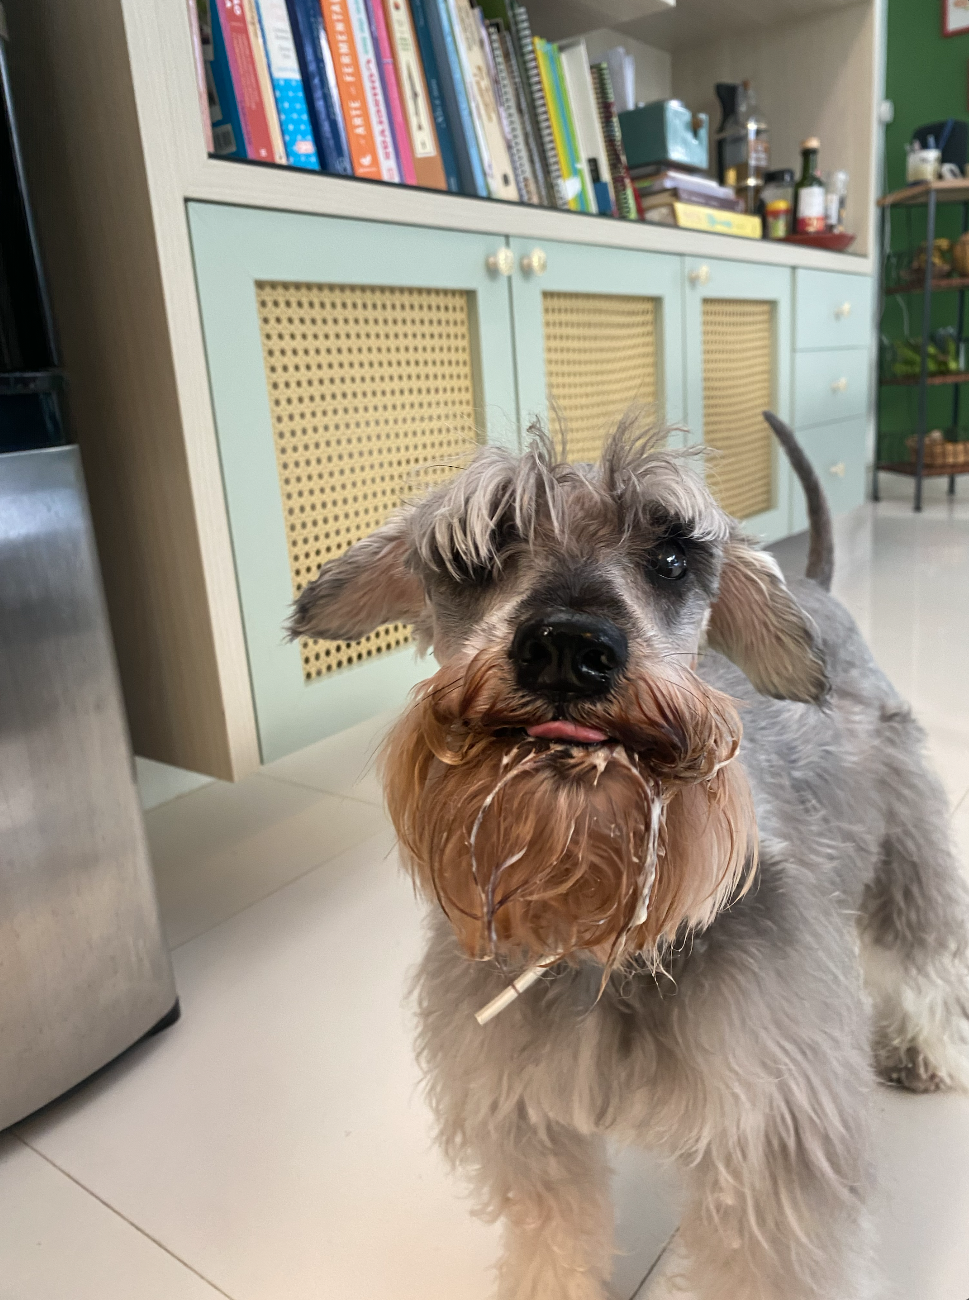

In [ ]:
img = Image.open("images/snowden.png")  # Open the image file
img = resize_image(image=img, max_size=2048)
img

In [115]:
from typing import Literal
from langchain_openai import ChatOpenAI

# Initialize the ChatOpenAI model with specific parameters
model_openai = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


class ClassificadorAnimais(BaseModel):
    """A resposta de uma função que classifica animais em cachorros, gatos ou pássaros."""

    # The label containing the animal classification
    animal: Literal["cachorro", "gato", "pássaro", "nenhum"] = Field(
        default_factory=str,
        description="O rótulo de animal atribuído ao texto. Você só pode ter 'cachorro', 'gato', 'pássaro' ou 'nenhum' como valores.",
    )


model_animal_classification = model_openai.with_structured_output(ClassificadorAnimais)

# Create a human message containing both instructions and the image URL
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Classifique a imagem abaixo como cachorro, gato ou pássaro.",
        },
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encode_image_to_base64(img)}"}},
    ]
)

output = model_animal_classification.invoke([message])


In [116]:
output

ClassificadorAnimais(animal='cachorro')

Now, let's try a different task: extracting information from images. We'll use a receipt and a photo from box of dog medicine.

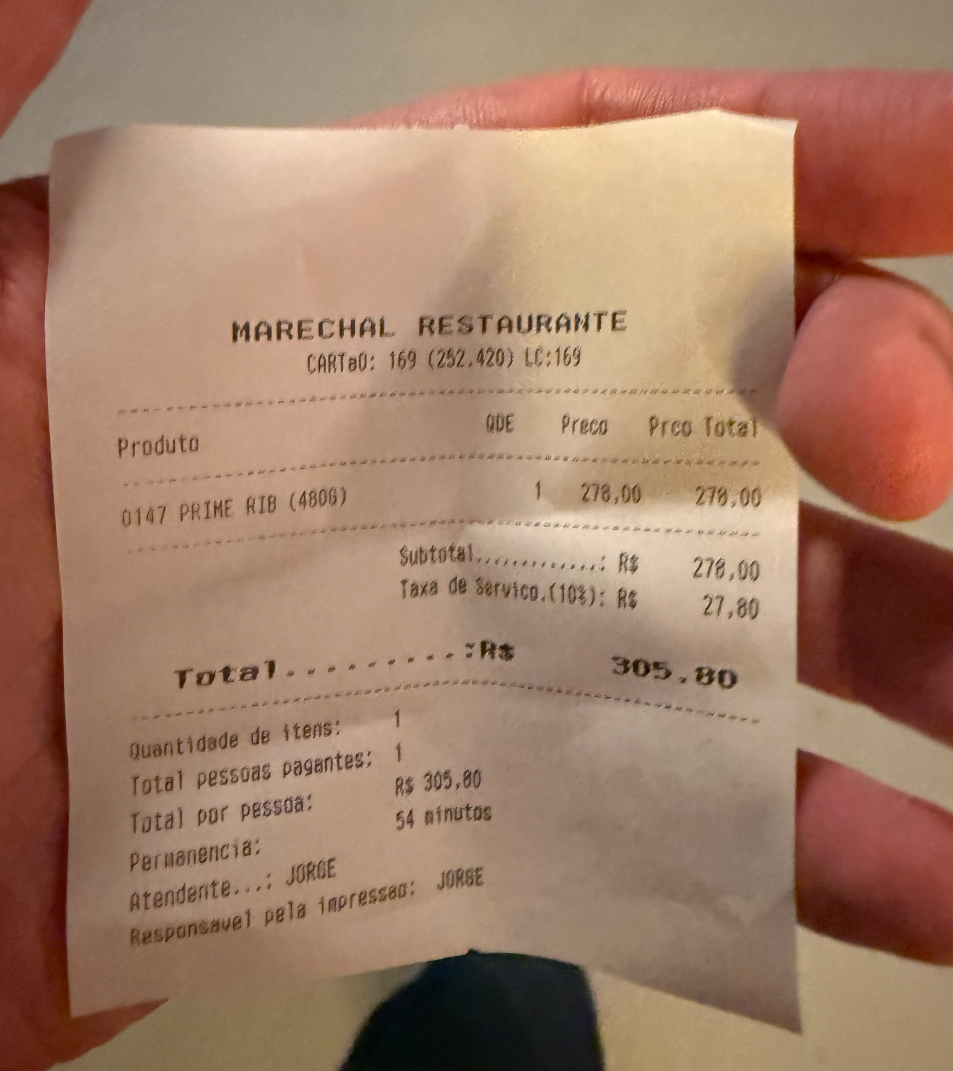

In [117]:
image_receipt = Image.open("images/marechal.png")  # Open the image file
image_receipt = resize_image(image=image_receipt, max_size=2048)
image_receipt

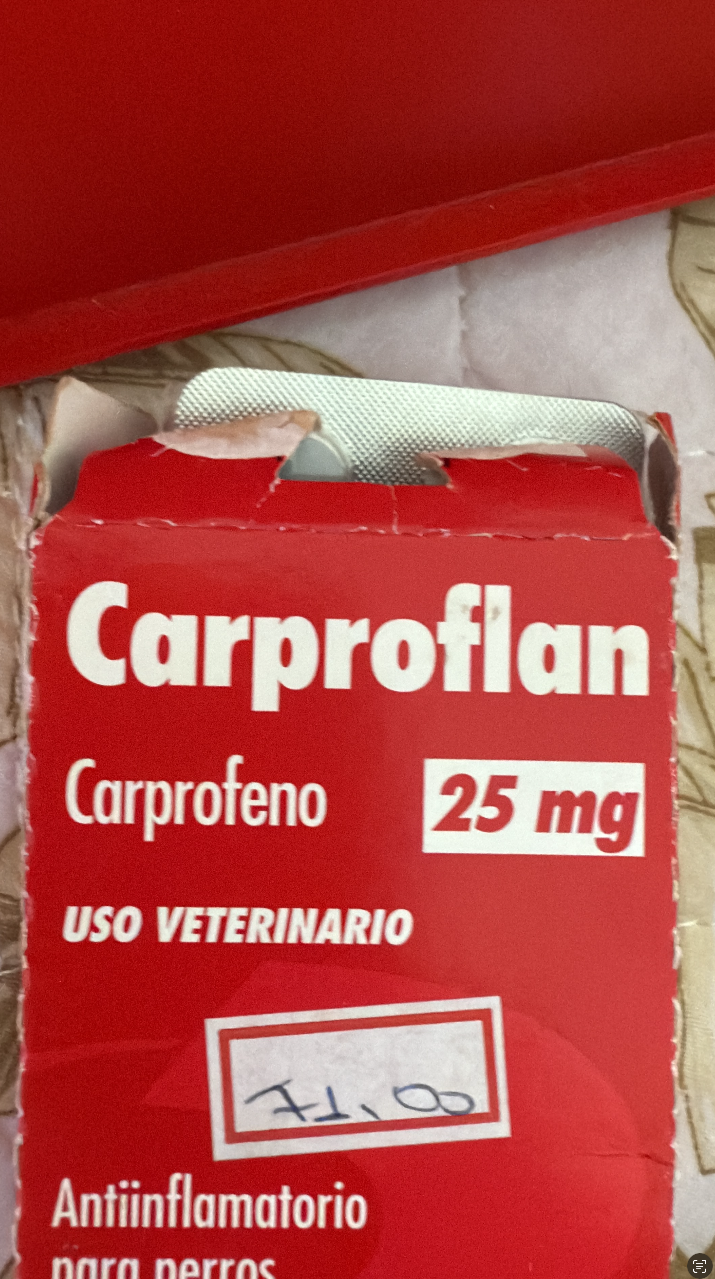

In [118]:
image_medicine = Image.open("images/medicamento.png")  # Open the image file
image_medicine = resize_image(image=image_medicine, max_size=2048)
image_medicine

In [ ]:
model_drug_extraction = model_openai.with_structured_output(Medicamento)

# Create a human message containing both instructions and the image URL
message = HumanMessage(
    content=[
        {"type": "text", "text": "Extraia as informações da imagem a seguir conforme o esquema"},
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encode_image_to_base64(image_medicine)}"}},
    ]
)

output = model_drug_extraction.invoke([message])
output


Medicamento(nome_comercial='Carproflan', principio_ativo='Carprofeno', dosagem='25 mg')

In [124]:
class LinhaRecibo(BaseModel):
    """Uma linha de um recibo de restaurante."""

    nome_item: str = Field(default_factory=str, description="O nome do item")
    preco_item: float = Field(default_factory=float, description="O preço do item")
    quantidade_item: int = Field(default_factory=int, description="A quantidade do item")


class ReciboRestaurante(BaseModel):
    """Um recibo de restaurante."""

    linhas: list[LinhaRecibo] = Field(default_factory=list, description="Uma lista com as linhas do recibo")
    total: float = Field(default_factory=float, description="O valor total do recibo")
    pago: float = Field(default_factory=float, description="O valor pago pelo cliente")
    troco: float = Field(default_factory=float, description="O troco a ser devolvido ao cliente")
    taxa_servico: float = Field(default_factory=float, description="A taxa de serviço do restaurante")
    nome_estabelecimento: str = Field(default_factory=str, description="O nome do estabelecimento")
    nome_atendente: str = Field(default_factory=str, description="O nome do atendente")


In [125]:
model_receipt_extraction = model_openai.with_structured_output(ReciboRestaurante)

# Create a human message containing both instructions and the image URL
message = HumanMessage(
    content=[
        {"type": "text", "text": "Extraia as informações da imagem a seguir conforme o esquema"},
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encode_image_to_base64(image_receipt)}"}},
    ]
)
output = model_receipt_extraction.invoke([message])
output

ReciboRestaurante(linhas=[LinhaRecibo(nome_item='PRIME RIB (480G)', preco_item=278.0, quantidade_item=1)], total=305.8, pago=305.8, troco=0.0, taxa_servico=27.8, nome_estabelecimento='MARECHAL RESTAURANTE', nome_atendente='JORGE')

As you can see, structured output is a powerful feature that can be used as a zero-shot tool to extract specific information from text or images and ensure that it follows a predefined format. We can also use these schemas to perform zero-shot classification. By defining schemas and using the appropriate methods, you can exploit structured output to enhance the capabilities of language models and automate information extraction tasks.


## Takeaways

- LLMs with agentic behavior can make decisions and take actions without direct human intervention, enhancing their functionality and autonomy.

- Integrating LLMs with external tools significantly expands their capabilities, allowing them to perform a wider range of tasks.

- Tool calling enables LLMs to break down complex queries, retrieve information from multiple sources, and provide structured outputs.

- Different agent architectures offer various approaches to building AI systems that can reason, plan, and execute tasks autonomously.

- Practical implementations of agentic behavior and tool calling can be achieved using frameworks like LangChain, with support for both cloud-based and local LLMs.

- Structured output techniques like JSON mode and tool calling help in extracting specific information from unstructured text and ensuring consistent data formats.

- When working with DataFrame agents or other powerful tools, it's critical to consider security repercussions and use proper sandboxing techniques.

# Questions

1. What is agentic behavior with respect to LLMs?

2. What role does LangChain play in creating agents with LLMs?

3. What are some examples of agent architectures mentioned in the class?

4. What is tool/function calling and why is it important for LLMs?

5. What is the general flow for using tool calling with LLMs?

6. What is structured output, and how is it useful?

7. What are some practical implementations of agentic behavior and tool calling demonstrated in the class?

8. What is the role of the AgentExecutor in LangChain?

9. Why is it important to consider security effects when using DataFrame agents or other powerful tools?

10. How does the `.with_structured_output()` method in LangChain help in generating structured output?

`Answers are commented inside this cell`

<!-- - Agentic behavior refers to the ability of language models to perform goal-directed actions autonomously based on inputs and context, allowing them to make decisions and take actions without direct human intervention.

- LangChain helps the creation of agents by using LLMs as reasoning engines to determine necessary actions and inputs, enabling more complex and autonomous decision-making processes.

- The class mentions several agent architectures, including ReAct, BabyAGI, and MRKL.

- Tool/function calling refers to the ability of LLMs to interact with external tools and resources, extending their capabilities beyond text generation. It enables LLMs to perform a wider range of tasks and handle complex queries by breaking them down into smaller, manageable steps.

- The general flow involves generating tool calls with a chat model, invoking the appropriate tools, formatting the results as ToolMessages, and passing the messages back to the model to generate a final answer.

- Structured output constrains the LLM's output to a specific format or structure, which is useful for data storage, information extraction, and ensuring consistent data formats.

- The class demonstrates practical implementations using the LangChain framework with OpenAI and local Llama 3.1 models, including examples of fetching financial data, creating agents that interact with Pandas DataFrames, and extracting structured information from text.

- The AgentExecutor is a runtime that executes the actions determined by the Agent, enabling the creation of autonomous systems that can interact with external tools and resources.

- It is important to consider security effects because allowing arbitrary code execution can lead to vulnerabilities such as data breaches or data loss. Proper sandboxing techniques should be used to mitigate these risks.

- The `.with_structured_output()` method takes a schema as input and returns a dict or Pydantic object. It handles the necessary prompting and output parsing, ensuring that the LLM's output adheres to the specified format and structure. -->